In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas_profiling import ProfileReport
import json
import pickle
import requests
from scipy.stats import pearsonr
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
import seaborn as sns

In [40]:
df = pd.read_csv('../data/processed/.csv') # loading the dataframe
# lat_long = pd.read_csv('../data/raw/osopenuprn_202205.csv')
# fuel_poverty = pd.read_excel("../data/raw/sub-regional-fuel-poverty-2022-tables.xlsx", sheet_name="Table 3", header=2)
# elec_consump = pd.read_excel('../data/raw/LSOA_domestic_elec_2010-20.xlsx', sheet_name="2020", header=4, engine='openpyxl')
# postcodes = pd.read_csv("../data/raw/PCD_OA_LSOA_MSOA_LAD_AUG19_UK_LU.csv", low_memory=False)

In [36]:
print(df.columns)

Index(['address', 'floor-height', 'heating-cost-potential',
       'hot-water-cost-potential', 'construction-age-band',
       'potential-energy-rating', 'mainheat-energy-eff', 'windows-env-eff',
       'lighting-energy-eff', 'environment-impact-potential', 'glazed-type',
       'heating-cost-current', 'mainheatcont-description', 'property-type',
       'energy-tariff', 'mechanical-ventilation', 'hot-water-cost-current',
       'postcode', 'solar-water-heating-flag', 'constituency',
       'co2-emissions-potential', 'number-heated-rooms', 'floor-description',
       'energy-consumption-potential', 'local-authority', 'built-form',
       'number-open-fireplaces', 'windows-description', 'glazed-area',
       'inspection-date', 'mains-gas-flag', 'co2-emiss-curr-per-floor-area',
       'constituency-label', 'roof-energy-eff', 'total-floor-area',
       'environment-impact-current', 'co2-emissions-current',
       'roof-description', 'number-habitable-rooms', 'hot-water-env-eff',
       'ma

In [41]:
df['photo-supply'].unique()

array([  0.,  nan,   1.,  72.,   4.,  20.,  10.,   2.,  16.,  90.,  73.,
        13.,  12., 100.,  30.,  25.,   7.,  50.,   9.,  35.,  70.,  45.,
        40.,  11.,  48.,  80.,  66.,  33.,  75.,  47.,  60.,  46.,  15.,
        65.,  62.,  27.,  44.,  14.,  95.,  28.,   8.,  43.,  24.,   3.,
        38.,  41.,  19.,  85.,  26.,   5.,  55.,  49.,  37.,  36.,  22.,
        39.,  17.,  57.])

In [37]:
cat = df.select_dtypes(exclude=['int', 'float']).columns
num = df.select_dtypes(exclude=['object']).columns
cat

Index(['address', 'construction-age-band', 'potential-energy-rating',
       'mainheat-energy-eff', 'windows-env-eff', 'lighting-energy-eff',
       'glazed-type', 'mainheatcont-description', 'property-type',
       'energy-tariff', 'mechanical-ventilation', 'postcode',
       'solar-water-heating-flag', 'constituency', 'floor-description',
       'local-authority', 'built-form', 'windows-description', 'glazed-area',
       'inspection-date', 'mains-gas-flag', 'constituency-label',
       'roof-energy-eff', 'roof-description', 'hot-water-env-eff',
       'mainheatc-energy-eff', 'main-fuel', 'lighting-env-eff',
       'windows-energy-eff', 'roof-env-eff', 'walls-energy-eff',
       'mainheat-env-eff', 'lodgement-datetime', 'current-energy-rating',
       'walls-env-eff', 'transaction-type', 'mainheat-description',
       'mainheatc-env-eff', 'lmk-key', 'tenure', 'floor-level',
       'hot-water-energy-eff', 'walls-description', 'hotwater-description',
       'secondheat-description', 'l

In [38]:
wind = df[df['wind-turbine-count']==1]

In [39]:
drop_missing = []
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)[:20]


main-heating-controls             98.509311
floor-thermal-transmittance       93.894435
roof-thermal-transmittance        93.710843
walls-thermal-transmittance       91.577919
floor-level                       86.374734
floor-height                      54.050008
photo-supply                      36.892180
solar-water-heating-flag          34.698827
percentage-low-energy-lighting    25.255810
roof-env-eff                      16.481990
roof-energy-eff                   16.481990
glazed-type                       11.092910
mains-gas-flag                     8.527088
glazed-area                        8.437256
number-habitable-rooms             8.437121
number-heated-rooms                8.437121
mechanical-ventilation             8.437121
extension-count                    8.437121
construction-age-band              8.374794
multi-glaze-proportion             8.152857
dtype: float64

In [18]:
solar_water = df['solar-water-heating-flag']
solar_water.dropna(inplace=True)

In [19]:
Y = solar_water[solar_water=='Y']
N = solar_water[solar_water=='N']

In [20]:
print('Length Y: '+str(len(Y)))
print('Length N: '+str(len(N)))

Length Y: 1290
Length N: 617086


In [21]:
df['solar-water-heating-flag'] = df['solar-water-heating-flag'].replace('Y',1)
df['solar-water-heating-flag'] = df['solar-water-heating-flag'].replace('N',0)

In [22]:
df['current-energy-rating'] = df['current-energy-rating'].replace('G',0)
df['current-energy-rating'] = df['current-energy-rating'].replace('F',1)
df['current-energy-rating'] = df['current-energy-rating'].replace('E',2)
df['current-energy-rating'] = df['current-energy-rating'].replace('D',3)
df['current-energy-rating'] = df['current-energy-rating'].replace('C',4)
df['current-energy-rating'] = df['current-energy-rating'].replace('B',5)
df['current-energy-rating'] = df['current-energy-rating'].replace('A',6)
df['current-energy-rating'] = df['current-energy-rating'].replace('INVALID!',np.nan)

In [23]:
df['wind-turbine-count'].unique()

array([ 0., -1., nan,  1.])

In [33]:
photo = df[df['photo-supply']>0]
photo['current-energy-rating']
water = df[df['solar-water-heating-flag']=='Y']
wind = df[df['wind-turbine-count']==-1]

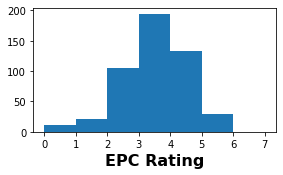

In [30]:
plt.figure(figsize=(20,5))

windy = wind['current-energy-rating']
plt.subplot(241)
plt.hist(windy,bins=[0,1,2,3,4,5,6,7])
plt.xlabel('EPC Rating',fontsize=16, weight='bold')

plt.show()

In [34]:
print(df['current-energy-rating'].mean())
print(photo['current-energy-rating'].mean())
print(water['current-energy-rating'].mean())
print(wind['current-energy-rating'].mean())

3.0996117087776334
4.075581395348837
nan
4.542299349240781


In [ ]:
EPC['energy-consumption-current'].describe()

In [ ]:
plt.figure(figsize=(20,5))

full = EPC['energy-consumption-current']
bins=int(7)
plt.subplot(241)
plt.hist(full)
plt.xlabel('EPC Rating',fontsize=16, weight='bold')

partial = photo['energy-consumption-current']
plt.subplot(242)
plt.hist(partial)
plt.xlabel('EPC Rating',fontsize=16, weight='bold')

solar = water['energy-consumption-current']
plt.subplot(243)
plt.hist(solar)
plt.xlabel('EPC Rating',fontsize=16, weight='bold')

plt.show()

In [ ]:
print(EPC['energy-consumption-current'].mean())
print(photo['energy-consumption-current'].mean())
print(water['energy-consumption-current'].mean())

In [ ]:
neg_energy = EPC[EPC['energy-consumption-current']<0]
print(neg_energy['photo-supply'].describe())
print(photo['photo-supply'].describe())
print(neg_energy['current-energy-efficiency'].describe())
print(photo['current-energy-efficiency'].describe())

In [ ]:
over100 = EPC[EPC['current-energy-efficiency']>100]

In [ ]:
print(over100['photo-supply'].describe())
print(over100['energy-consumption-current'].describe())

In [ ]:
EPC['built-form'].unique()